In [1]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import sklearn
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [2]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [3]:
X = pd.read_csv('truncatedHashtx.1.csv')

X.drop(X.tail(30000).index,inplace=True)

X.drop(["Unnamed: 0", "Unnamed: 0.1", "No."], axis=1, inplace=True)

In [4]:
# List of the column names with nominal features that should be one-hot encoded
onehot_features = ['Source', 'Destination', 'Protocol', 'Info']

# One-hot encode these features 
onehot = sklearn.preprocessing.OneHotEncoder(sparse=False) # we want a non-sparse matrix for concatenation
encoded = onehot.fit_transform(X[onehot_features])
encoded = pd.DataFrame(encoded) # the output of the encoding is a NumPy array, but we want it as a Pandas DataFrame

# One-hot encoding produces an output with more columns than the input, so we can't just reassign the output to X. 
# There are a few ways to put the encoded features in the original dataframe, but none of them are that elegant, so we'll just drop the old columns and concatenate the new
X.drop(onehot_features, axis=1, inplace=True)
X = pd.concat([X, encoded], axis=1)

# print encoded X for inspection

In [6]:
# This decides how many clusters we should use based on the SSE graph and the elbow locator
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

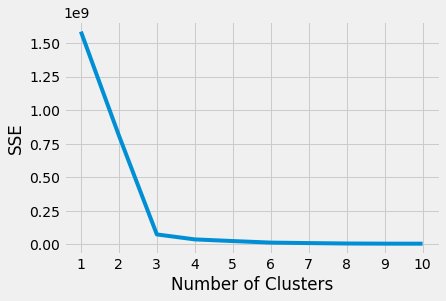

In [7]:
 plt.style.use("fivethirtyeight")
 plt.plot(range(1, 11), sse)
 plt.xticks(range(1, 11))
 plt.xlabel("Number of Clusters")
 plt.ylabel("SSE")
 plt.show()

In [8]:
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow

3

In [9]:
label = kmeans.fit_predict(X)
 
print(label)

[2 5 6 ... 5 2 2]


In [10]:
pca = PCA(2)
 
#Transform the data
X = pca.fit_transform(X)
 
X.shape

(20000, 2)

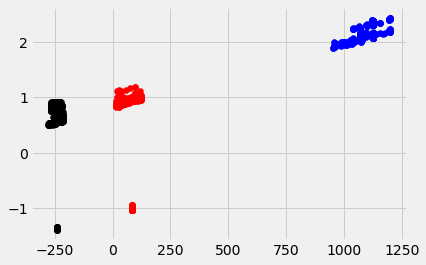

In [11]:
#filter rows of original data
filtered_label0 = X[label == 2]
filtered_label1 = X[label == 5]
filtered_label2 = X[label == 6]
                     
#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1] , color = 'red')
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1] , color = 'black')
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'blue')

plt.show()